In [1]:
#Shouldn't need to run parts 1-5. Start from the first sets of imports down below.
import pandas as pd

In [13]:
fake_json = pd.read_json("C:\\Users\\Eric Liu\\Desktop\\Purdue\\Sophomore 2nd Semester\\ILS490\\fake_data.json", orient="records")
real_json = pd.read_json("C:\\Users\\Eric Liu\\Desktop\\Purdue\\Sophomore 2nd Semester\\ILS490\\real_data.json", orient="records")

fake_info = fake_json['includes']
real_info = real_json['includes']

0    {'users': [{'public_metrics': {'followers_coun...
1    {'users': [{'username': 'indianabankers', 'ver...
2    {'users': [{'created_at': '2009-09-26T14:10:09...
3    {'users': [{'verified': False, 'protected': Fa...
4    {'users': [{'public_metrics': {'followers_coun...
Name: includes, dtype: object


In [3]:
fake_list = []
created_at = []
verified = []
followers_count = []
following_count = []
tweet_count = []
listed_count = []
protected = []
for index in fake_info:
    for stuff in index['users']:
        if not pd.isna(stuff):
            fake_list.append(stuff['username'])
            created_at.append(stuff['created_at'])
            verified.append(stuff['verified'])   
            protected.append(stuff['protected'])
            followers_count.append(stuff['public_metrics']['followers_count'])
            following_count.append(stuff['public_metrics']['following_count'])
            tweet_count.append(stuff['public_metrics']['tweet_count'])
            listed_count.append(stuff['public_metrics']['listed_count'])

fake_df = pd.DataFrame(fake_list, columns=['User'])
fake_df['Created At'] = created_at
fake_df['Verified'] = verified
fake_df['Protected'] = protected
fake_df['Followers Count'] = followers_count
fake_df['Following Count'] = following_count
fake_df['Tweet Count'] = tweet_count
fake_df['Listed Count'] = listed_count
fake_df['Misinformation'] = [1] * len(fake_df)
fake_df['Misinformation'] = 0
print(len(fake_info))
print(len(fake_df))

31
2032


In [4]:
real_list = []
created_at = []
verified = []
followers_count = []
following_count = []
tweet_count = []
listed_count = []
protected = []

for index in real_info:
    for stuff in index['users']:
        if not pd.isna(stuff):
            real_list.append(stuff['username'])
            created_at.append(stuff['created_at'])
            verified.append(stuff['verified'])   
            protected.append(stuff['protected'])
            followers_count.append(stuff['public_metrics']['followers_count'])
            following_count.append(stuff['public_metrics']['following_count'])
            tweet_count.append(stuff['public_metrics']['tweet_count'])
            listed_count.append(stuff['public_metrics']['listed_count'])

real_df = pd.DataFrame(real_list, columns=['User'])
real_df['Created At'] = created_at
real_df['Verified'] = verified
real_df['Protected'] = protected
real_df['Followers Count'] = followers_count
real_df['Following Count'] = following_count
real_df['Tweet Count'] = tweet_count
real_df['Listed Count'] = listed_count
real_df['Misinformation'] = [1] * len(real_df)
real_df['Misinformation'] = 1
print(len(real_info))
print(len(real_df))

40
2794


In [5]:
frames = [real_df, fake_df]
full_df = pd.concat(frames)
full_df.to_csv("C:\\Users\\Eric Liu\\Desktop\\Purdue\\Sophomore 2nd Semester\\ILS490\\all_data.csv")

In [1]:
#Start running code from here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
# First run through
full_df = pd.read_csv("C:\\Users\\Eric Liu\\Desktop\\Purdue\\Sophomore 2nd Semester\\ILS490\\all_data.csv")
X = full_df.iloc[:, [3, 5, 6, 7, 8]]
y = full_df.loc[:, 'Misinformation']
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=0) # Can use different random state to test.
clf=DecisionTreeClassifier(random_state=0) # For example, 42 is used pretty commonly.
clf.fit(X_train,y_train)
y_train_predicted=clf.predict(X_train)
y_test_predicted=clf.predict(X_test)
print(accuracy_score(y_train,y_train_predicted))
print(accuracy_score(y_test,y_test_predicted))

0.9997236805747444
0.9776304888152444


In [3]:
from sklearn.model_selection import GridSearchCV

In [10]:
# DON'T RUN THIS PART, IT WAS TO OBTAIN OPTIMAL PARAMETERS
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 50),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [12]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


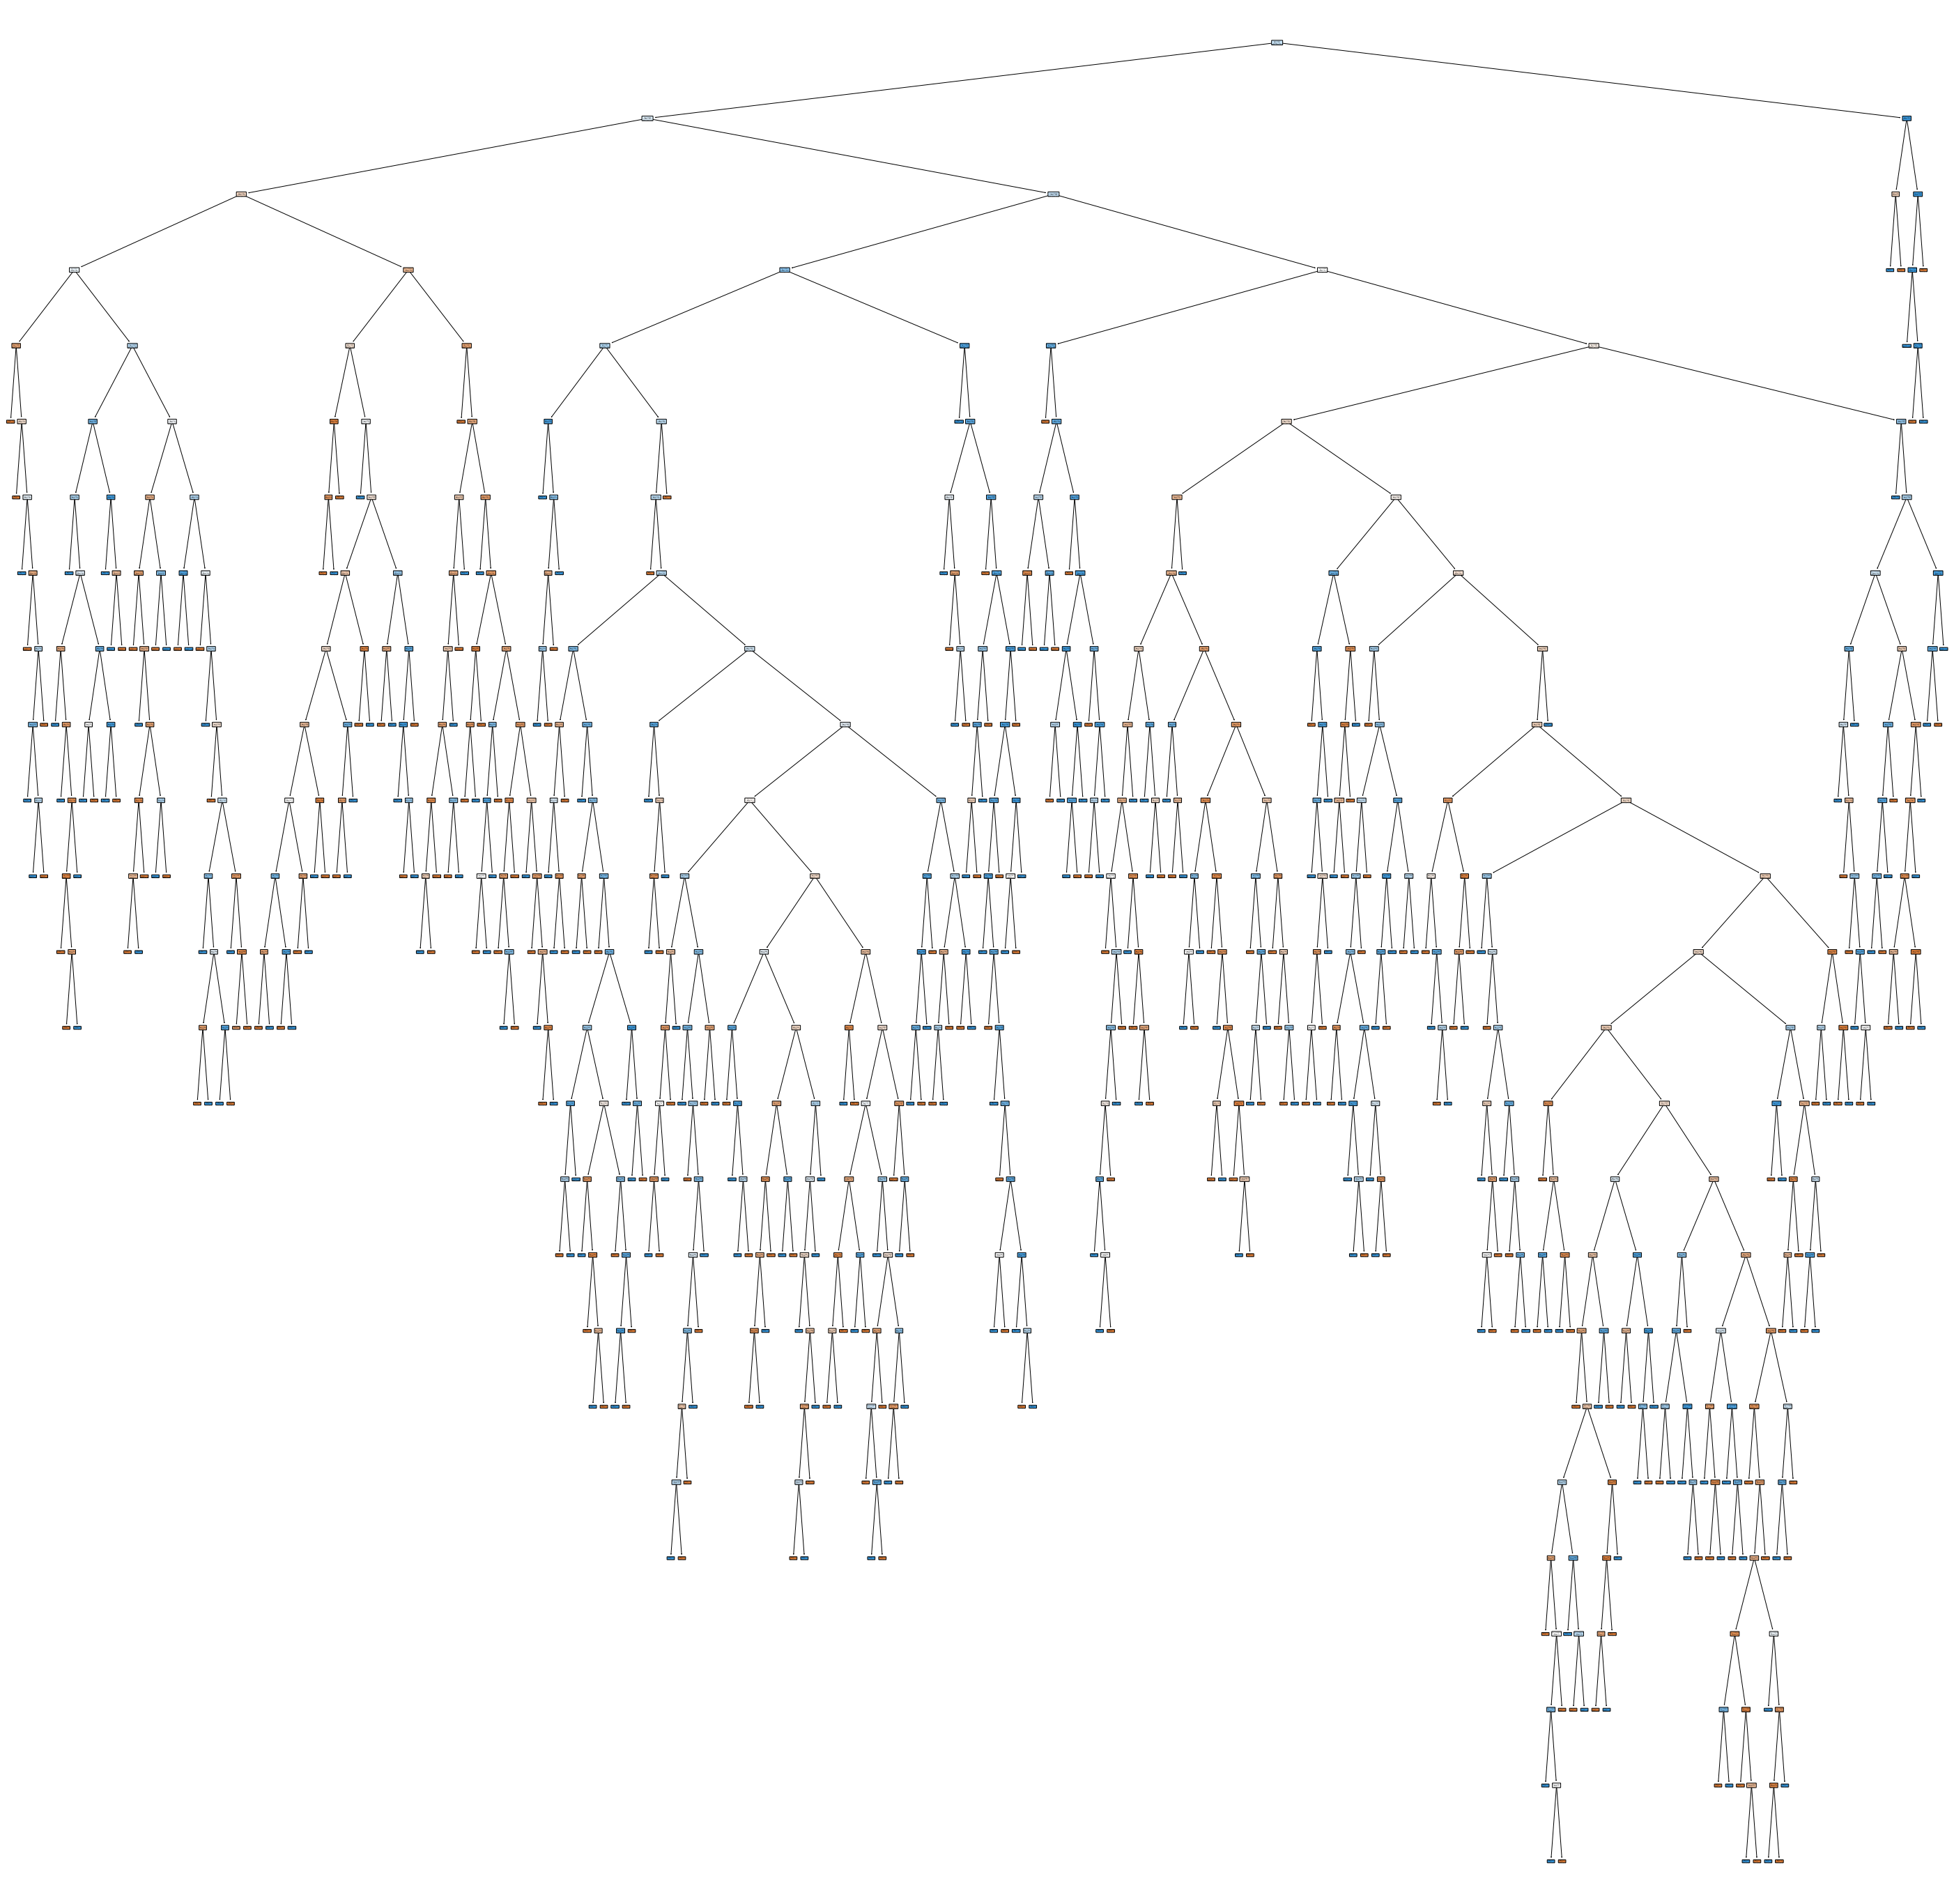

In [3]:
clf=DecisionTreeClassifier(criterion= 'gini',max_depth= 30,min_samples_leaf= 1,min_samples_split= 2,splitter= 'best')
clf.fit(X_train,y_train)
plt.figure(figsize=(50,50))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [4]:
y_predicted=clf.predict(X_test)
accuracy_score(y_test,y_predicted)

0.9726594863297432

In [5]:
verified = ["Verified", None]
followers = ["Followers Count", None, None]
following = ["Following Count", None, None]
tweet = ["Tweet Count", None, None]
listed = ["Listed Count", None, None]
nice_format = [verified, followers, following, tweet, listed]

In [12]:
# Note: this reference tweet is known to be misinformation.
testing_X = pd.DataFrame([False], columns = ["Verified"])
testing_X['Followers Count'] = 1470
testing_X['Following Count'] = 2594
testing_X['Tweet Count'] = 52372
testing_X['Listed Count'] = 18

# Features needed to determine path
feature = clf.tree_.feature
threshold = clf.tree_.threshold
node_indicator = clf.decision_path(testing_X)
leaf_id = clf.apply(testing_X)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue
    if testing_X.iloc[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"
    
    # This can be uncommmented, it prints out the path the decision tree takes.
    print(
        "decision node {node} : ({column} = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            column=testing_X.columns[feature[node_id]],
            value=testing_X.iloc[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )
    # Code to get nicer output.
    if feature[node_id] == 0:
        if threshold_sign == "<=":
            nice_format[feature[node_id]][1] = "False"
        else:
            nice_format[feature[node_id]][1] = "True"
    else:
        if threshold_sign == "<=":
            if nice_format[feature[node_id]][2] is None:
                nice_format[feature[node_id]][2] = threshold[node_id]
            elif nice_format[feature[node_id]][2] > threshold[node_id]:
                nice_format[feature[node_id]][2] = threshold[node_id]
        else:
            if nice_format[feature[node_id]][1] is None:
                nice_format[feature[node_id]][1] = threshold[node_id]
            elif nice_format[feature[node_id]][1] < threshold[node_id]:
                nice_format[feature[node_id]][1] = threshold[node_id]
print("\n")
for feature in nice_format:
    if feature[0] == 'Verified':
        print(feature[0], ":", feature[1])
    else:
        print(feature[1], "<", feature[0], "<=", feature[2]) 
print("\n")
print("Prediction: ", clf.predict(testing_X))

decision node 0 : (Verified = False) <= 0.5)
decision node 1 : (Followers Count = 1470) > 122.5)
decision node 187 : (Tweet Count = 52372) > 23724.0)
decision node 419 : (Following Count = 2594) > 199.5)
decision node 449 : (Listed Count = 18) <= 235.5)
decision node 450 : (Followers Count = 1470) > 747.0)
decision node 524 : (Following Count = 2594) > 1221.5)
decision node 546 : (Listed Count = 18) > 3.5)
decision node 578 : (Tweet Count = 52372) <= 725735.5)
decision node 579 : (Followers Count = 1470) > 1099.0)
decision node 593 : (Following Count = 2594) > 2166.5)
decision node 613 : (Listed Count = 18) <= 161.0)
decision node 614 : (Followers Count = 1470) <= 14798.0)
decision node 615 : (Listed Count = 18) > 11.5)
decision node 625 : (Following Count = 2594) <= 3985.5)
decision node 626 : (Listed Count = 18) <= 68.5)
decision node 627 : (Followers Count = 1470) <= 3488.0)
decision node 628 : (Tweet Count = 52372) > 51891.5)
decision node 630 : (Listed Count = 18) <= 52.0)
decisio

In [8]:
# This method doesn't work, because this assumes data is linearly separable, which it appears to not be.
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=42) #Test with 0 as well.
logmodel = LogisticRegression(random_state=42).fit(X_train, y_train)
print(logmodel.score(X_train, y_train))
print(logmodel.score(X_test, y_test))

0.6178502348715115
0.6048053024026512
